<a href="https://colab.research.google.com/github/willianszwy/PP2.2.3-Validacao-Cruzada-e-Busca-em-Grade/blob/main/PP2_2_3_Validacao_Cruzada_e_Busca_em_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz

--2021-12-18 15:33:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolvendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando-se a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 11240707 (11M) [application/x-httpd-php]
Salvando em: “covtype.data.gz”

covtype.data.gz     100%[===================>]  10,72M  3,52MB/s    em 3,0s    

2021-12-18 15:33:14 (3,52 MB/s) - “covtype.data.gz” salvo [11240707/11240707]



In [ ]:
!gunzip covtype.data.gz

In [ ]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
df_forest_cover = pd.read_csv("covtype.data", names = columns)

In [ ]:
df_forest_cover.drop(columns=['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],inplace=True)

## 6 melhores arquiteturas

| activation | solver | hidden_layer_sizes | max_iter | atributos categóricos | acurácia média | acurácia desvio padrão | F1-Score média | F1-Score desvio padrão |
|------------|--------|--------------------|----------|-----------------------|----------------|------------------------|----------------|------------------------|
| 'tanh'     | 'adam' | (10, )            |      150 | não                   | 0.7223         | 0.0016                 | 0.4919         | 0.2633                 |
| 'tanh'     | 'adam' | (10, )            |      200 | não                   | 0.7218         | 0.0025                 | 0.5072         | 0.2566                 |
| 'relu'     | 'sgd'  | (10, )            |      300 | não                   | 0.7173         | 0.0005                 | 0.4763         | 0.2617                 |
| 'relu'     | 'adam' | (10, )            |      300 | não                   | 0.7140         | 0.0007                 | 0.5064         | 0.2275                 |
| 'tanh'     | 'adam' | (5, 5)             |      200 | não                   | 0.7097         | 0.0007                 | 0.4587         | 0.2665                 |
| 'identity' | 'sgd'  | (15, )            |      200 | não                   | 0.6967         | 0.0005                 | 0.4198         | 0.2660                 |

## Identificando a mellhor solução

Como resultado da busca em grade com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

Os parâmetros da rede neural são apresentados abaixo:

In [ ]:
parameters = {'solver':['sgd','adam'],
              'batch_size':[1,100],
              'hidden_layer_sizes': [(10,),(5,5),(15)],
              'learning_rate_init':[0.01,0.001],
              'n_iter_no_change':[10],
              'max_iter':[150,200],
             }

In [ ]:
clf = MLPClassifier()

In [ ]:
gridSearch = GridSearchCV(estimator = clf,          
                    param_grid = parameters,
                    n_jobs=-1,
                    cv=5, verbose=10)   

In [ ]:
y = df_forest_cover['Cover_Type']
X = df_forest_cover.drop('Cover_Type', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

In [ ]:
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [ ]:
gridSearch.fit(X_train_std, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 5/5; 4/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam
[CV 5/5; 4/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.660 total time=51.0min
[CV 5/5; 8/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam
[CV 5/5; 8/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.705 total time=45.8min
[CV 1/5; 12/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam
[CV 1/5; 12/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.689 total time=63.2min
[CV 4/5; 16/48] START batch_size=1, hidde

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 1/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd
[CV 2/5; 1/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd;, score=0.575 total time=28.4min
[CV 4/5; 5/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=sgd
[CV 4/5; 5/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=sgd;, score=0.713 total time=48.8min
[CV 1/5; 10/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 1/5; 10/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.697 total time=42.1min
[CV 4/5; 13/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_it

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 4/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam
[CV 1/5; 4/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.683 total time=30.9min
[CV 3/5; 6/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam
[CV 3/5; 6/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.720 total time=58.1min
[CV 5/5; 11/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 5/5; 11/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.488 total time=30.9min
[CV 2/5; 14/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 4/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam
[CV 4/5; 4/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.660 total time=31.2min
[CV 1/5; 7/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 1/5; 7/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.714 total time=42.8min
[CV 4/5; 9/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd
[CV 4/5; 9/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd;, score=0.488 total time=41.9min
[CV 1/5; 13/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_iter

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 2/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 2/5; 2/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.688 total time=33.5min
[CV 3/5; 7/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 3/5; 7/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.711 total time=112.6min
[CV 4/5; 15/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 4/5; 15/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.704 total time=118.3min
[CV 1/5; 25/48] START batch_size=100, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, 

[CV 5/5; 2/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 5/5; 2/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.685 total time=31.0min
[CV 4/5; 6/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam
[CV 4/5; 6/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.717 total time=38.8min
[CV 3/5; 9/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd
[CV 3/5; 9/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd;, score=0.488 total time=49.7min
[CV 1/5; 14/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_it

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 2/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 1/5; 2/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.693 total time=31.1min
[CV 5/5; 6/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam
[CV 5/5; 6/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.712 total time=55.9min
[CV 3/5; 11/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 3/5; 11/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.365 total time=31.0min
[CV 3/5; 13/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 4/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam
[CV 2/5; 4/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.680 total time=36.1min
[CV 5/5; 7/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 5/5; 7/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.667 total time=90.1min
[CV 5/5; 14/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam
[CV 5/5; 14/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.706 total time=90.6min
[CV 3/5; 20/48] START batch_size=1, hidden_layer_sizes=15, learning_rate_init=0.01, max_iter=200, n_ite

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 2/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 3/5; 2/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.688 total time=33.9min
[CV 4/5; 7/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 4/5; 7/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.711 total time=49.6min
[CV 5/5; 10/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 5/5; 10/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.666 total time=95.1min
[CV 5/5; 17/48] START batch_size=1, hidden_layer_sizes=15, learning_rate_init=0.01, max_iter=150, n_iter_

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 4/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam
[CV 3/5; 4/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.690 total time=48.7min
[CV 4/5; 8/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam
[CV 4/5; 8/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.714 total time=39.1min
[CV 4/5; 11/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 4/5; 11/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.453 total time=41.8min
[CV 2/5; 15/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, n_

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 3/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd
[CV 4/5; 3/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=200, n_iter_no_change=10, solver=sgd;, score=0.680 total time=39.2min
[CV 1/5; 8/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam
[CV 1/5; 8/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.714 total time=44.1min
[CV 4/5; 10/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 4/5; 10/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.674 total time=39.5min
[CV 4/5; 14/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=150, n_

/Users/willians/opt/anaconda3/envs/visao_computacional/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 2/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 4/5; 2/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.684 total time=43.5min
[CV 3/5; 8/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam
[CV 3/5; 8/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=200, n_iter_no_change=10, solver=adam;, score=0.713 total time=33.9min
[CV 2/5; 10/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 2/5; 10/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.686 total time=76.0min
[CV 5/5; 15/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, 

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'batch_size': [1, 100],
                         'hidden_layer_sizes': [(10,), (5, 5), 15],
                         'learning_rate_init': [0.01, 0.001],
                         'max_iter': [150, 200], 'n_iter_no_change': [10],
                         'solver': ['sgd', 'adam']},
             verbose=10)

In [ ]:
pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1834.067088,275.943466,0.044498,0.001062,1,"(10,)",0.01,150,10,sgd,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.540533,0.575164,0.644845,0.660319,0.577937,0.599760,0.045363,46
1,2074.820235,275.655450,0.054162,0.004743,1,"(10,)",0.01,150,10,adam,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.693209,0.688095,0.688095,0.684132,0.684685,0.687643,0.003239,37
2,1860.554830,287.481471,0.045469,0.001720,1,"(10,)",0.01,200,10,sgd,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.649935,0.620467,0.540348,0.680432,0.674162,0.633069,0.050936,44
3,2374.595786,516.966598,0.056015,0.005332,1,"(10,)",0.01,200,10,adam,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.683177,0.680337,0.689742,0.659864,0.660048,0.674634,0.012367,42
4,3290.941878,632.933984,0.043980,0.002620,1,"(10,)",0.001,150,10,sgd,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.692484,0.691340,0.682722,0.712666,0.711818,0.698206,0.011950,34
5,2933.899747,502.467258,0.041928,0.003198,1,"(10,)",0.001,150,10,adam,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.715743,0.711514,0.720231,0.716994,0.712433,0.715383,0.003159,18
6,4472.737686,1549.490562,0.043365,0.002052,1,"(10,)",0.001,200,10,sgd,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.714096,0.707334,0.711293,0.711388,0.667154,0.702253,0.017681,33
7,2395.877275,265.702565,0.043831,0.004000,1,"(10,)",0.001,200,10,adam,"{'batch_size': 1, 'hidden_layer_sizes': (10,),...",0.713838,0.715215,0.713432,0.714179,0.705167,0.712366,0.003648,20
8,2739.628466,489.997089,0.037651,0.001860,1,"(5, 5)",0.01,150,10,sgd,"{'batch_size': 1, 'hidden_layer_sizes': (5, 5)...",0.430921,0.426213,0.487682,0.487688,0.487688,0.464038,0.029000,47
9,3564.465150,1333.273646,0.042708,0.002981,1,"(5, 5)",0.01,150,10,adam,"{'batch_size': 1, 'hidden_layer_sizes': (5, 5)...",0.697229,0.686214,0.686706,0.673830,0.665753,0.681946,0.010977,40


[CV 3/5; 1/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd
[CV 3/5; 1/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=sgd;, score=0.645 total time=30.3min
[CV 1/5; 6/48] START batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam
[CV 1/5; 6/48] END batch_size=1, hidden_layer_sizes=(10,), learning_rate_init=0.001, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.716 total time=52.9min
[CV 3/5; 10/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam
[CV 3/5; 10/48] END batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=150, n_iter_no_change=10, solver=adam;, score=0.687 total time=44.3min
[CV 1/5; 15/48] START batch_size=1, hidden_layer_sizes=(5, 5), learning_rate_init=0.001, max_iter=200, n_

In [ ]:
print('Melhor configuração:\n', gridSearch.best_params_)

Melhor configuração:
 {'batch_size': 100, 'hidden_layer_sizes': 15, 'learning_rate_init': 0.001, 'max_iter': 150, 'n_iter_no_change': 10, 'solver': 'adam'}


In [ ]:
rank = pd.concat([pd.DataFrame(gridSearch.cv_results_["params"]),pd.DataFrame(gridSearch.cv_results_["mean_test_score"], columns=["Accuracy"]),pd.DataFrame(gridSearch.cv_results_["rank_test_score"], columns=["Rank"])],axis=1)

## 6 melhores arquiteturas

In [ ]:
rank.sort_values(by=['Rank']).head(6)

,batch_size,hidden_layer_sizes,learning_rate_init,max_iter,n_iter_no_change,solver,Accuracy,Rank
45,100,15,0.001,150,10,adam,0.727480,1
47,100,15,0.001,200,10,adam,0.727043,2
40,100,15,0.010,150,10,sgd,0.726248,3
46,100,15,0.001,200,10,sgd,0.723881,4
44,100,15,0.001,150,10,sgd,0.722904,5
42,100,15,0.010,200,10,sgd,0.722587,6


## Empacotando a solução

Suponha que você deva entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [ ]:
from pickle import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
best_model = MLPClassifier(batch_size = 100, hidden_layer_sizes = (15,), learning_rate_init = 0.001, max_iter = 150, n_iter_no_change = 10, solver = 'adam')

2 Treinando o modelo com todos os dados

2.1 Separando os dados em atributos preditores e atributo alvo, rescpectivamente X_train_std e y.

In [ ]:
#misturando os dados
df_forest_cover = df_forest_cover.sample(n = len(df_forest_cover))

y = df_forest_cover['Cover_Type']
X = df_forest_cover.drop('Cover_Type', axis=1)

X_train_std = (X - np.mean(X))/np.std(X)

2.2 Treinando

In [ ]:
best_model.fit(X_train_std, y)

MLPClassifier(batch_size=100, hidden_layer_sizes=(15,), max_iter=150)

3 Salve o modelo em disco

In [ ]:
dump(best_model, open("model.pkl", "wb"))
best_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 150,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

4 Construa uma rotina que recupere o modelo em disco

In [ ]:
#Consultando o model feito pela equipe que está no seguinte github:
#https://github.com/willianszwy/PP2.2.3-Validacao-Cruzada-e-Busca-em-Grade

# Descomentar essa linha se der erro
#!git clone https://github.com/willianszwy/PP2.2.3-Validacao-Cruzada-e-Busca-em-Grade.git

#Se você optar por fazer o upload do file manualmente inserindo na pasta de arquivos ao lado, mude o caminho do path... como segue abaixo
#path = "model.pkl"

path = "PP2.2.3-Validacao-Cruzada-e-Busca-em-Grade/model.pkl"

In [ ]:
final_model = load(open(path, "rb"))
final_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 100,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 150,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

5 Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

5.1 Fazendo previsões com todos os elementos do dataset

In [ ]:
y_pred = final_model.predict(X_train_std)

5.2 Matriz de confusão

In [ ]:
cm = confusion_matrix(y, y_pred, labels=final_model.classes_)
print(cm)

[[150342  57832     27      0    136     20   3483]
 [ 49731 228132   3157      0    600   1449    232]
 [     0   6733  24554    789      0   3678      0]
 [     0      8   1119   1185      0    435      0]
 [    29   8103    101      0   1177     82      1]
 [     1   4588   7204    263      3   5308      0]
 [  9155     71      0      0      0      0  11284]]


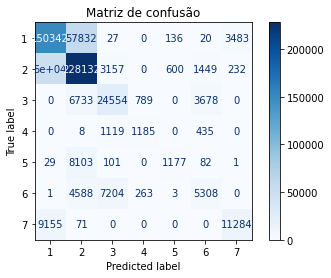

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap = "Blues")
plt.title("Matriz de confusão")
plt.show()

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.71      0.71    211840
           2       0.75      0.81      0.77    283301
           3       0.68      0.69      0.68     35754
           4       0.53      0.43      0.48      2747
           5       0.61      0.12      0.21      9493
           6       0.48      0.31      0.37     17367
           7       0.75      0.55      0.64     20510

    accuracy                           0.73    581012
   macro avg       0.65      0.52      0.55    581012
weighted avg       0.72      0.73      0.72    581012

